# Assessment Problems

## Problem 1: Data from yfinance


https://github.com/ranaroussi/yfinance


In [17]:
# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# Operating system.
import os

# Yahoo finance data.
import yfinance as yf


In [7]:
# Tickers:
 # A list of stock symbols used to find data from yfinance

# Get data : 
# The get_data function enables retrieval of pricing snapshots, as well as fundamental and reference data, in a single call.
# See: https://cdn.refinitiv.com/public/rd-lib-python-doc/1.0.0.0/book/en/sections/access-layer/access/get-data-function.html
# period an interval used to obtain historical data

# Download data:
# This function uses the yfinance Python library to download historical stock data.
# See: https://medium.com/%40anjalivemuri97/day-4-fetching-historical-stock-data-with-yfinance-f45f3bd8b9c6
# I use auto_adjust=True, to omit the future warning
# See: https://github.com/ranaroussi/yfinance/blob/0713d9386769b168926d3959efd8310b56a33096/yfinance/utils.py#L445-L462

# DataFrame:
# It’s widely used for data analysis, cleaning, and visualization.Supports filtering, sorting, aggregation, and analysis
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [8]:
# Get historical data for multiple tickers at once:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# Get data:
def get_data(tickers, period="5d", interval="1h"): 
    data = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True) 
    return data
df=get_data(tickers,period="5d", interval="1d")

[*********************100%***********************]  5 of 5 completed


In [15]:
# Saving data into csv file:
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html 

# Date time:
# Used to record the exact date and time
# See: https://docs.python.org/3/library/datetime.html

In [21]:
from datetime import datetime

def save_data(df):
    folder = "data"
    os.makedirs(folder, exist_ok=True)

    # Generate timestamp filename
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filename = f"{timestamp}.csv"

    # Full path
    filepath = os.path.join(folder, filename)

    # Save dataframe
    df.to_csv(filepath, index=False)

    print(f"Saved file: {filepath}")
    return filepath
save_data(df)

Saved file: data\20251201-115117.csv


'data\\20251201-115117.csv'

## Problem 2: Plotting Data

In [10]:
import datetime as dt
import matplotlib.pyplot as plt
import os


In [11]:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]
def get_data(tickers, period="5d", interval="1h"): 
    data = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True) 
    return data
df=get_data(tickers,period="5d", interval="1d")
df.head()

[*********************100%***********************]  5 of 5 completed


Ticker            AMZN                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  216.350006  222.210007  215.179993  220.690002  68490500   
2025-11-24  222.559998  227.330002  222.270004  226.279999  54318400   
2025-11-25  226.380005  230.520004  223.800003  229.669998  39379300   
2025-11-26  230.740005  231.750000  228.770004  229.160004  38497900   
2025-11-28  231.240005  233.289993  230.220001  233.220001  20292300   

Ticker            META                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-11-21  588.500000  598.119995  581.859985  594.250000  21052600  ...   
2025-11-24  598.719971  616.700012  597.630005  613.049988  23554900  ...   
2025-11-25  624.000000  637.049988  618.299988  636.219971  25213000  ...   
2025-11-26  637.690002  638.359985  631.630005  633.609985  15209500  ...   
2025-11-28  636.080017  648.049988  635.500000  647.950012  11033200  ...   

Ticker            NFLX                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  105.129997  106.529999  103.809998  104.309998  41232700   
2025-11-24  104.250000  108.040001  103.320000  106.970001  62918300   
2025-11-25  106.120003  106.300003  103.820000  104.400002  35122600   
2025-11-26  105.739998  106.949997  105.220001  106.139999  27951000   
2025-11-28  106.440002  107.940002  106.239998  107.580002  15021600   

Ticker            AAPL                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2025-11-21  265.950012  273.329987  265.670013  271.489990  59030800  
2025-11-24  270.899994  277.000000  270.899994  275.920013  65585800  
2025-11-25  275.269989  280.380005  275.250000  276.970001  46914200  
2025-11-26  276.959991  279.529999  276.630005  277.549988  33431400  
2025-11-28  277.260010  279.000000  275.989990  278.850006  20135600  

[5 rows x 25 columns]

In [12]:
df.columns

MultiIndex([( 'AMZN',   'Open'),
            ( 'AMZN',   'High'),
            ( 'AMZN',    'Low'),
            ( 'AMZN',  'Close'),
            ( 'AMZN', 'Volume'),
            ( 'META',   'Open'),
            ( 'META',   'High'),
            ( 'META',    'Low'),
            ( 'META',  'Close'),
            ( 'META', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume'),
            ( 'NFLX',   'Open'),
            ( 'NFLX',   'High'),
            ( 'NFLX',    'Low'),
            ( 'NFLX',  'Close'),
            ( 'NFLX', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume')],
           names=['Ticker', 'Price'])

<Axes: xlabel='Date'>

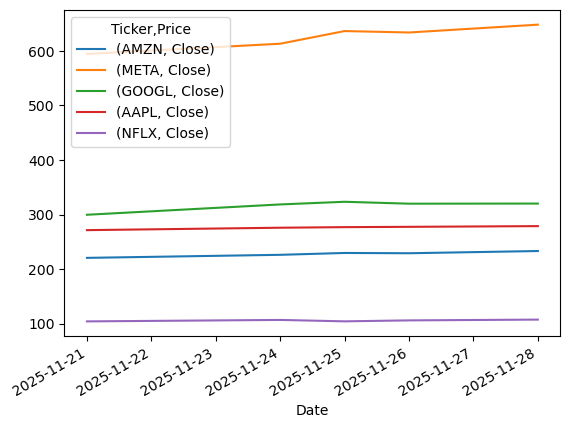

In [13]:
df[[('AMZN', 'Close'),('META', 'Close'),('GOOGL', 'Close'),('AAPL', 'Close'),('NFLX', 'Close')]].plot()


In [24]:
# Save plot
plots_folder = "plots"
os.makedirs(plots_folder, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plot_filename = os.path.join(plots_folder, f"{timestamp}.png")
plt.savefig(plot_filename, dpi=300)  

<Figure size 640x480 with 0 Axes>

## Problem 3: Script

In [25]:
#! /usr/bin/env python

# Dates and time
import datetime as dt

#Yahoo Finance data
import yfinance as yf

# Get data
df= yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOGL"], period="5d", interval="1h", auto_adjust=True)

# Current data and time
now=dt.datetime.now()

# File name
filename="data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv"

# Save data as CSV file
df.to_csv(filename)

[*********************100%***********************]  5 of 5 completed


## Problem 4: Automation

In [27]:
name: Run FAANG script

on:
  schedule:
    - cron: "0 9 * * 6"   # Every Saturday at 09:00 UTC
  workflow_dispatch:       # Allows manual run from GitHub

jobs:
  run-script:
    runs-on: ubuntu-latest

    steps:
      - name: Checkout repository
        uses: actions/checkout@v4

      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: "3.10"

      - name: Install dependencies
        run: |
          pip install -r requirements.txt

      - name: Run FAANG script
        run: |
          python your_script.py   # <-- tutaj wpisz nazwę swojego skryptu


SyntaxError: invalid syntax (3820983879.py, line 1)

## END